In [21]:
!pip install dowhy
!pip install pydot
!pip install graphviz

In [56]:
import pandas as pd
from dowhy import CausalModel
import statsmodels.api as sm

The adjustment set for aDNB: "Treatment", "dCoA", "dPPPM", "dT", "dCoGo"
The adjustment set for Growth:

[]
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d               
────────────(E[dANB])
d[Treatment]         
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→dANB then P(dANB|Treatment,,U) = P(dANB|Treatment,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

ATE for Treatment on Growth: 1.888883855016545
ATET for Treatment on dANB: 0.5524475524475524


C:\Users\ivkpo\anaconda3\envs\hse\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ivkpo\anaconda3\envs\hse\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\ivkpo\anaconda3\envs\hse\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\ivkpo\anaconda3\envs\hse\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\ivkpo\anaconda3\envs\hse\Lib\site-packages\statsmodels\genmod\families\family.py:1055: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -
C:\Use

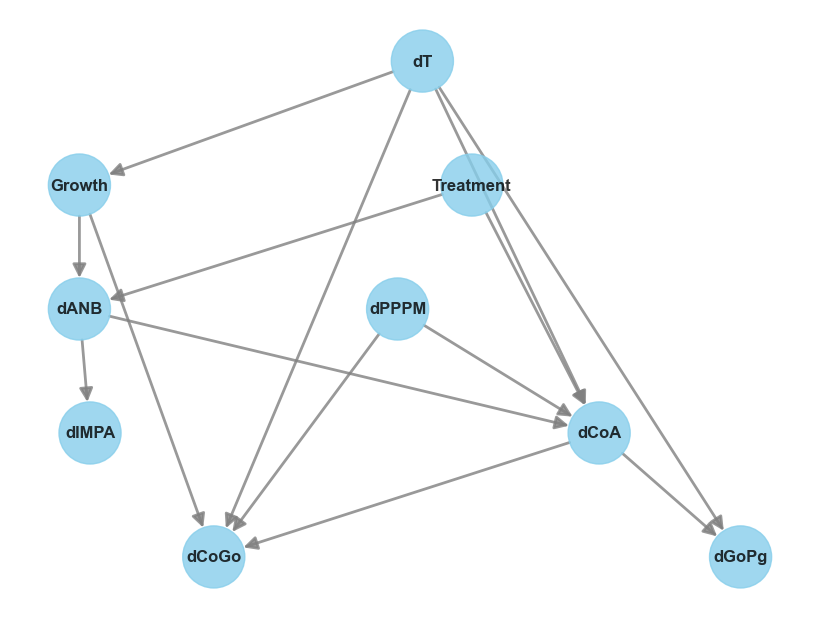

In [59]:
df = pd.read_csv("malocclusion.csv")

# defining graph
casual_graph = """digraph {
Treatment;
dANB;
dPPPM;
dIMPA;
dCoA;
dGoPg;
dCoGo;
dT;
Growth;
Treatment -> dANB;
Treatment -> dCoA;
dT -> Growth;
dT -> dCoA;
dT -> dGoPg;
dT -> dCoGo;
Growth -> dANB;
Growth -> dCoGo;
dPPPM -> dCoA;
dPPPM -> dCoGo;
dANB -> dIMPA;
dANB -> dCoA;
dCoA -> dGoPg;
dCoA -> dCoGo;
}
"""

# Defining casual model
model_danb = CausalModel(
    data=df,
    treatment="Treatment",
    outcome="dANB",
    graph=casual_graph.replace("\n", " "),
    identify_vars=True
)


# Identify the causal effect using the backdoor adjustment method
identified_estimand = model_danb.identify_effect(proceed_when_unidentifiable=True)

print(identified_estimand)
estimate = model_danb.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Causal effect estimate for Treatment on dANB
print("ATE for Treatment on Growth:", estimate.value)

# Causal effect estimate for Treatment on dANB
estimate = model_danb.estimate_effect(identified_estimand, method_name="backdoor.generalized_linear_model", method_params={
    'glm_family': sm.families.Binomial(),
})
print("ATET for Treatment on dANB:", estimate.value)

model_danb.view_model()

In [60]:
model_growth = CausalModel(
    data=df,
    treatment="Treatment",
    outcome="Growth",
    graph=casual_graph.replace("\n", " "),
    identify_vars=True
)

identified_estimand = model_growth.identify_effect()
print(identified_estimand)

estimate_ate = model_growth.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("ATE for Treatment on Growth:", estimate_ate.value)

estimate_atet = model_growth.estimate_effect(identified_estimand, method_name="backdoor.generalized_linear_model", method_params={
    'glm_family': sm.families.Binomial()
})
print("ATET for Treatment on Growth:", estimate_atet.value)

No directed path from ['Treatment'] to ['Growth'] in the causal graph.
Causal effect is zero.
ATE for Treatment on Growth: 0
ATET for Treatment on Growth: 0
